## Classification of Heart Disease Using the K-Nearest Neighbor Method

### Introduction
#### The heart is a human organ that plays a role in the circulatory system. Heart disease is a condition where the heart cannot carry out its duties properly. Globally, the number one cause of death every year is cardiovascular disease. Cardiovascular disease is a disease caused by impaired function of the heart and blood vessels.
#### Data mining is a series of processes of obtaining knowledge or patterns from data sets. Data mining will solve problems by analyzing data that already exists in the database. The output results from data mining can be used to improve decision making. One of the methods used in processing data mining is the K-Nearest Neighbor (KNN) method. KNN is carried out by looking for groups of objects in the training data that are closest or similar to objects in the new data or testing data. Calculating the performance of the K-Nearest Neighbor (KNN) method on cardiovascular disease data, the performance calculated is related to accuracy, precision, recall and f-measure.
#### The following is the design as shown in the image below:

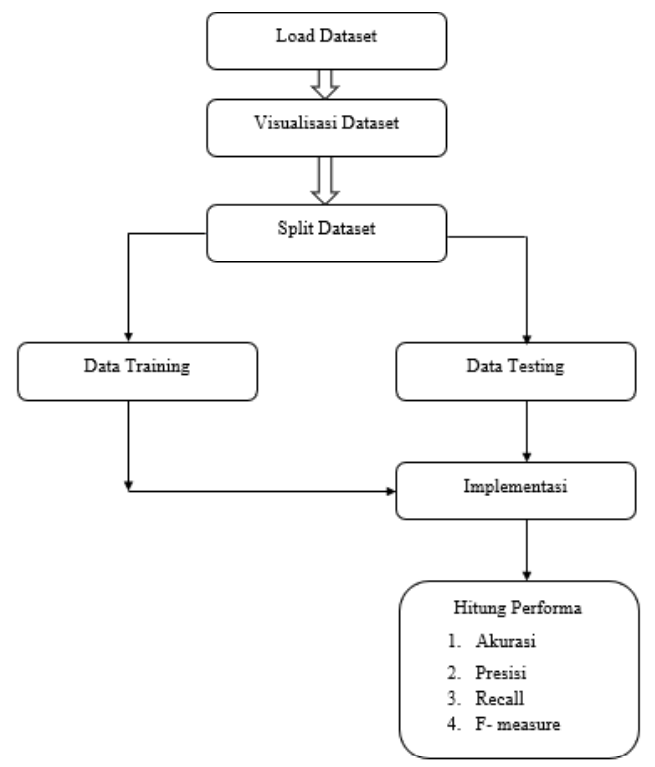

### 1. Visualization Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [2]:
data = read_csv('cardioo.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,40,1,156,85.0,140,90,3,1,0,0,1,1
1,2,40,1,165,64.0,130,70,3,1,0,0,0,1
2,3,40,2,169,82.0,150,100,1,1,0,0,1,1
3,4,40,2,178,95.0,130,90,3,3,0,0,1,1
4,5,40,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,68,1,164,50.0,100,60,1,1,1,0,1,0
996,997,68,1,153,77.0,110,70,1,1,0,0,1,0
997,998,68,1,156,55.0,110,60,1,1,0,0,1,0
998,999,68,1,159,86.0,130,90,1,1,0,0,1,0


In [3]:
data.shape

(1000, 13)

In [4]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
       dtype='object')]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender       1000 non-null   int64  
 3   height       1000 non-null   int64  
 4   weight       1000 non-null   float64
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   int64  
 8   gluc         1000 non-null   int64  
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [6]:
data.gender.value_counts()

1    634
2    366
Name: gender, dtype: int64

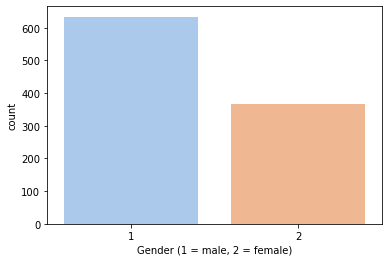

In [7]:
sns.countplot(x="gender", data=data, palette="pastel")
plt.xlabel("Gender (1 = male, 2 = female)")
plt.show()

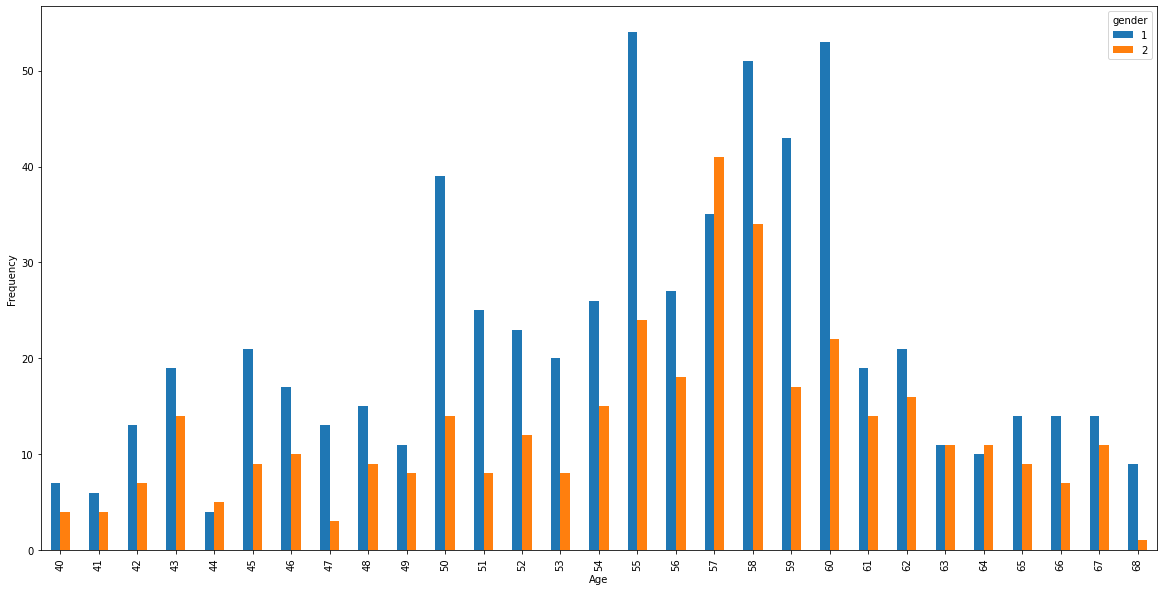

In [8]:
pd.crosstab(data.age,data.gender).plot(kind="bar",figsize=(20,10))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
countMale = len(data[data.gender==1])
countFemale = len(data[data.gender==2])
print("Percetage of Male : {:.2f}%".format((countMale / (len(data.gender))*100)))
print("Percetage of Female : {:.2f}%".format((countFemale / (len(data.gender))*100)))

Percetage of Male : 63.40%
Percetage of Female : 36.60%


### 2. Split Dataset
#### Divided into 2 data, namely Training Data and Testing Data

In [10]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:12]
y = data.iloc[:, 12]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size=0.1)

In [11]:
len(x_train), len(x_test)

(900, 100)

In [12]:
len(y_train), len(y_test)

(900, 100)

### 3. Implementation KNN Method

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8,p=2,metric='euclidean')
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=8)

#### The function above is a function to create a k-Nearest Neighbor classification where Classifier is the specified name or definition. There is a command n_neighbors=8 which is a function to determine the number of neighbors desired. The best k value for the k-Nearest Neighbor algorithm depends on the data, a higher k value will reduce the effect of noise on classification.

In [14]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### From the results above, it is found that the prediction results of y pred from testing data (x test) are 100 data. The next step is to determine the probability value of the prediction results using the following function:

In [16]:
classifier.predict_proba(x_test)

array([[0.875, 0.125],
       [0.625, 0.375],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.125, 0.875],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.25 , 0.75 ],
       [0.125, 0.875],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.875, 0.125],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.375, 0.625],
       [0.625, 0.375],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.875, 0.125],
       [0.25 , 0.75 ],
       [0.   , 1.   ],
       [0.375, 0.625],
       [0.25 , 0.75 ],
       [0.625, 0.375],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.875, 0.125],
       [0.   , 1.   ],
       [0.125, 0.875],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.1

#### The results above are the probability values of the predicted results, where in the first column matrix is the probability for classification 1, while the second column matrix is the probability for classification 2. The classification with the highest probability value will be the predicted result.

### 4. Calculate Performance
#### Confusion matrix is a method used to carry out accuracy calculations. So the accuracy value of the y test value compared with the y pred value is as follows:

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  5],
       [ 4, 79]], dtype=int64)

Text(42.0, 0.5, 'Actual')

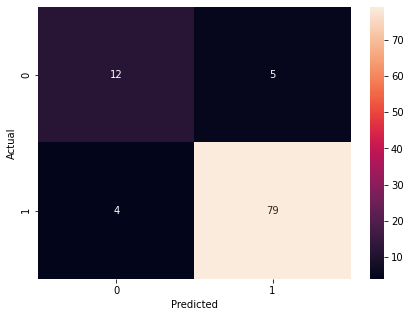

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### The y_actual value in the image above is the y value in the original data, while the y_pred value is the predicted y value obtained in the previous step.

#### Performance Calculation Results

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.94      0.95      0.95        83

    accuracy                           0.91       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.91      0.91      0.91       100



### Improve Data Accuracy by Modifying the Number of Neighbors
#### Looking for the best K value with the lowest Error Rate to reduce the error rate so that it can perform better.

Text(0, 0.5, 'Error rate')

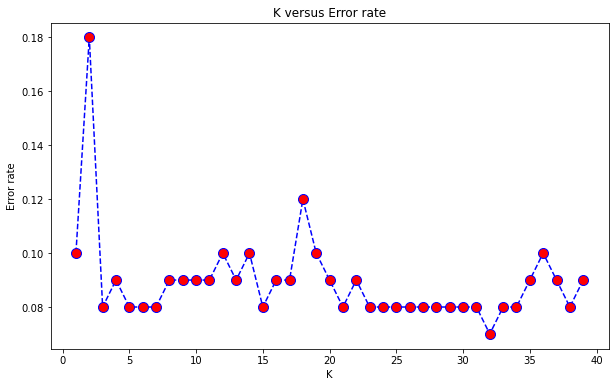

In [21]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

#### It can be seen above that the lowest K value will produce the lowest error rate, namely 32. After that, carry out the accuracy assessment again and so on.

In [22]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[12  5]
 [ 2 81]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.94      0.98      0.96        83

    accuracy                           0.93       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.93      0.93      0.93       100



#### Macro avg is the average precision/recall/F1 of all classifications. In this case, one example is macro-avg = (classification precision 0 + classification precision 1) / 2. If calculated, the results are in accordance with those above, namely the precision is 0.90 = 90%
#### So for K=8 the accuracy result is 91% and for K=32 the accuracy result is 93%. There is increased accuracy thereby minimizing prediction errors.